In [12]:
# evaluate logistic regression on the music genre classification set with label encoding
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
# define the location of the dataset
path = ('archive/Data/features_3_sec.csv')

#creating dataframe
df = pd.read_csv('features_3_sec.csv')

# separate into input and output columns
X = df.iloc[:, df.columns != "label"].drop(['filename','length'], axis=1)

#perform scaling
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = np.ravel(df.iloc[:, df.columns == "label"])

#setup for fitting, do label encoding (transform non-numerical labels into numerical labels)
label_encoder = LabelEncoder()
label_encoder.fit(y)
label_encoder.transform(y)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# further split the data set to create valid set
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.50, random_state=1)

# define the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit on the training set
model.fit(X_train, np.ravel(y_train,order='C'))

# predict on test set
yhat = model.predict(X_test)

# predict on validation set
val_pred = model.predict(X_valid)

# evaluate the model
acc_train = model.score(X_train, y_train)
acc_val = accuracy_score(y_valid, val_pred)
acc_test = accuracy_score(y_test, yhat)
print('Accuracy on train set: %.2f' % (acc_train*100))
print('Accuracy on test set: %.2f' % (acc_test*100))
print('Accuracy on valid set: %.2f' % (acc_val*100))

Accuracy on train set: 69.91
Accuracy on test set: 69.36
Accuracy on valid set: 67.50


In [15]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C": list(range(10)), "max_iter": [1000, 2000, 10000]}# l1 lasso l2 ridge
#logreg=LogisticRegression()
logreg_cv=GridSearchCV(model,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 9, 'max_iter': 1000}
accuracy : 0.7113370367891484


              precision    recall  f1-score   support

           0       0.65      0.71      0.68       326
           1       0.89      0.92      0.90       328
           2       0.69      0.60      0.64       346
           3       0.66      0.68      0.67       320
           4       0.77      0.61      0.68       346
           5       0.77      0.82      0.80       318
           6       0.77      0.85      0.81       331
           7       0.79      0.80      0.79       318
           8       0.64      0.66      0.65       341
           9       0.52      0.51      0.52       323

    accuracy                           0.72      3297
   macro avg       0.72      0.72      0.71      3297
weighted avg       0.72      0.72      0.71      3297



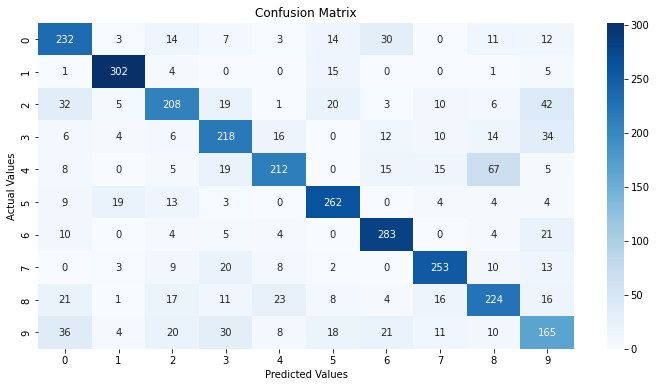

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

print(classification_report(y_test, yhat))

cm=confusion_matrix(y_test,yhat)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')